<a href="https://colab.research.google.com/github/haikalrsyn/all-kind-of-stuff/blob/main/%5B4_class%5D_Tugas_2_Praktikum_TPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muhammad Haikal Rasyadan
## G1401221026
## Tugas 2 Praktikum Teknik Pembelajaran Mesin

## Artificial Neural Network (ANN)

# Library

In [1]:
!pip install pandas
!pip install keras

import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Penyiapan Data

In [2]:
file_path = "/content/Pakistan house price dataset.csv"
df = pd.read_csv(file_path, delimiter=";")
df.head(10)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02/04/2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05/04/2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04/05/2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,1.6 Kanal,For Sale,8,04/05/2019,NaN,NaN,Kanal,1.6,1-5 Kanal
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,1 Kanal,For Sale,8,01/04/2019,NaN,NaN,Kanal,1.0,1-5 Kanal
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05/05/2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10/19/2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,6/27/2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal


Berdasarkan hasil dataframe awal, diketahui bahwa variabel dalam dataset terdiri dari dua tipe, yaitu numerik dan kategorik. Terdapat 12 variabel kategorik dan 8 variabel numerik. Namun, beberapa variabel, seperti `page_url`, `location_id`, `property_id`, dan lainnya dianggap kurang relevan untuk dimasukkan ke dalam model. Oleh karena itu, diperlukan proses seleksi variabel guna menentukan variabel yang paling sesuai untuk digunakan dalam pemodelan.

In [3]:
df["harga"] = df["price"].apply(lambda x:
                                "Sangat Murah" if x <= 8883882 else
                                "Murah" if x <= 17767764 else
                                "Mahal" if x <= 26651646 else
                                "Sangat Mahal")
df_H = df.drop(columns=["property_id", "location_id", "page_url", "date_added",
                        "location", "latitude", "longitude", "area", "agency",
                        "agent", "Area Category", "price"])
df_H.head()

,property_type,city,province_name,baths,purpose,bedrooms,Area Type,Area Size,harga
0,Flat,Islamabad,Islamabad Capital,2,For Sale,2,Marla,4.0,Murah
1,Flat,Islamabad,Islamabad Capital,3,For Sale,3,Marla,5.6,Sangat Murah
2,House,Islamabad,Islamabad Capital,6,For Sale,5,Marla,8.0,Murah
3,House,Islamabad,Islamabad Capital,4,For Sale,4,Kanal,2.0,Sangat Mahal
4,House,Islamabad,Islamabad Capital,3,For Sale,3,Marla,8.0,Sangat Murah


In [4]:
df_H["Area.M2"] = np.where(df_H["Area Type"] == "Marla", df_H["Area Size"] * 25.2929,
                  np.where(df_H["Area Type"] == "Kanal", df_H["Area Size"] * 505.857, np.nan))

df_H = df_H.drop(columns=["Area Type", "Area Size"])

df_H.head()


,property_type,city,province_name,baths,purpose,bedrooms,harga,Area.M2
0,Flat,Islamabad,Islamabad Capital,2,For Sale,2,Murah,101.17160
1,Flat,Islamabad,Islamabad Capital,3,For Sale,3,Sangat Murah,141.64024
2,House,Islamabad,Islamabad Capital,6,For Sale,5,Murah,202.34320
3,House,Islamabad,Islamabad Capital,4,For Sale,4,Sangat Mahal,1011.71400
4,House,Islamabad,Islamabad Capital,3,For Sale,3,Sangat Murah,202.34320


Sebelum dilakukan pemodelan, perlu ditentukan variabel yang akan digunakan dalam model. Untuk pemodelan klasifikasi, diperlukan variabel respons dalam bentuk kategorik. Oleh karena itu, jika variabel respons yang digunakan adalah `price`, maka perlu dilakukan transformasi tipe data karena variabel `price` memiliki bentuk numerik.

Transformasi ini dilakukan dengan menentukan nilai rata-rata atau median harga sebagai titik tengah (cutoff). Dalam hal ini, nilai rata-rata yang digunakan adalah 17.767.764 yang kemudian dibagi 2 lagi. Berdasarkan cutoff tersebut, kategori harga diklasifikasikan menjadi empat, yaitu:
- **Murah**, jika harga kurang dari atau sama dengan 17.767.764 dan lebih dari 8.883.882
- **Sangat Murah**, jika harga kurang dari atau sama dengan 8.883.882
- **Mahal**, jika harga lebih dari 17.767.764 dan kurang dari sama dengan 26.651.646
- **Sangat Mahal**, jika harga lebih dari 26.651.646

Selanjutnya, dilakukan pemilihan variabel yang akan dimasukkan ke dalam model. Variabel yang digunakan sebagai variabel penjelas meliputi:
- `property_type`
- `city`
- `province_name`
- `bath`
- `purpose`
- `bedroom`
- `Area_Type`

Sedangkan variabel `harga` yang telah dikategorikan akan digunakan sebagai variabel respons.

Selain itu pada variabel `Area_Type` satuan Marla dan Kanal dikonversi menjadi meter persegi agar memudahkan dalam interpretasi dan juga pemodelan. Sehingga yang sebelumnya merupakan variabel kategorik menjadi variabel numerik baru dengan nama `Area.M2`

In [5]:
print(df_H.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   city           168446 non-null  object 
 2   province_name  168446 non-null  object 
 3   baths          168446 non-null  int64  
 4   purpose        168446 non-null  object 
 5   bedrooms       168446 non-null  int64  
 6   harga          168446 non-null  object 
 7   Area.M2        168446 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.3+ MB
None


DataFrame ini terdiri dari 168.446 entri dengan 8 kolom yang mencakup informasi tentang properti, seperti jenis properti (`property_type`), kota (`city`), provinsi (`province_name`), jumlah kamar mandi (`baths`), tujuan penggunaan (`purpose`), jumlah kamar tidur (`bedrooms`), harga (`harga`), dan luas area dalam meter persegi (`Area.M2`). Semua kolom memiliki jumlah non-null penuh, menunjukkan tidak adanya satu nilai kosong di seluruh kolom.

In [6]:
print(df_H.describe())

               baths       bedrooms        Area.M2
count  168446.000000  168446.000000  168446.000000
mean        2.874227       3.179422     302.123707
std         2.463400       1.971401    2285.974027
min         0.000000       0.000000       0.000000
25%         0.000000       2.000000     121.405920
50%         3.000000       3.000000     179.579590
75%         4.000000       4.000000     303.514800
max       403.000000      68.000000  404685.600000


Statistik deskriptif menunjukkan bahwa jumlah kamar mandi (`baths`) dan kamar tidur (`bedrooms`) memiliki distribusi yang relatif sempit, dengan nilai rata-rata masing-masing sekitar 2,874 dan 3,179, serta standar deviasi sekitar 2,46 dan 1,97. Nilai minimum untuk kedua variabel ini adalah 0, menunjukkan adanya properti tanpa kamar mandi atau kamar tidur. Sementara itu, luas area (`Area.M2`) memiliki rata-rata sekitar 302,124 dengan variasi yang sangat besar (standar deviasi 2285.974) dibandingkan variabel lainnya. Nilai maksimumnya mencapai 404685,6, yang mencerminkan keberagaman ukuran properti dalam dataset.

In [7]:
df_H = df_H.dropna()
df_H.isnull().sum()

,0
property_type,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
harga,0
Area.M2,0


Seperti yang telah dijelaskan sebelumnya tidak terdapat *missing value* pada data. Oleh karena itu tidak dilakukan penanganan *missing value*

# Data Exploration

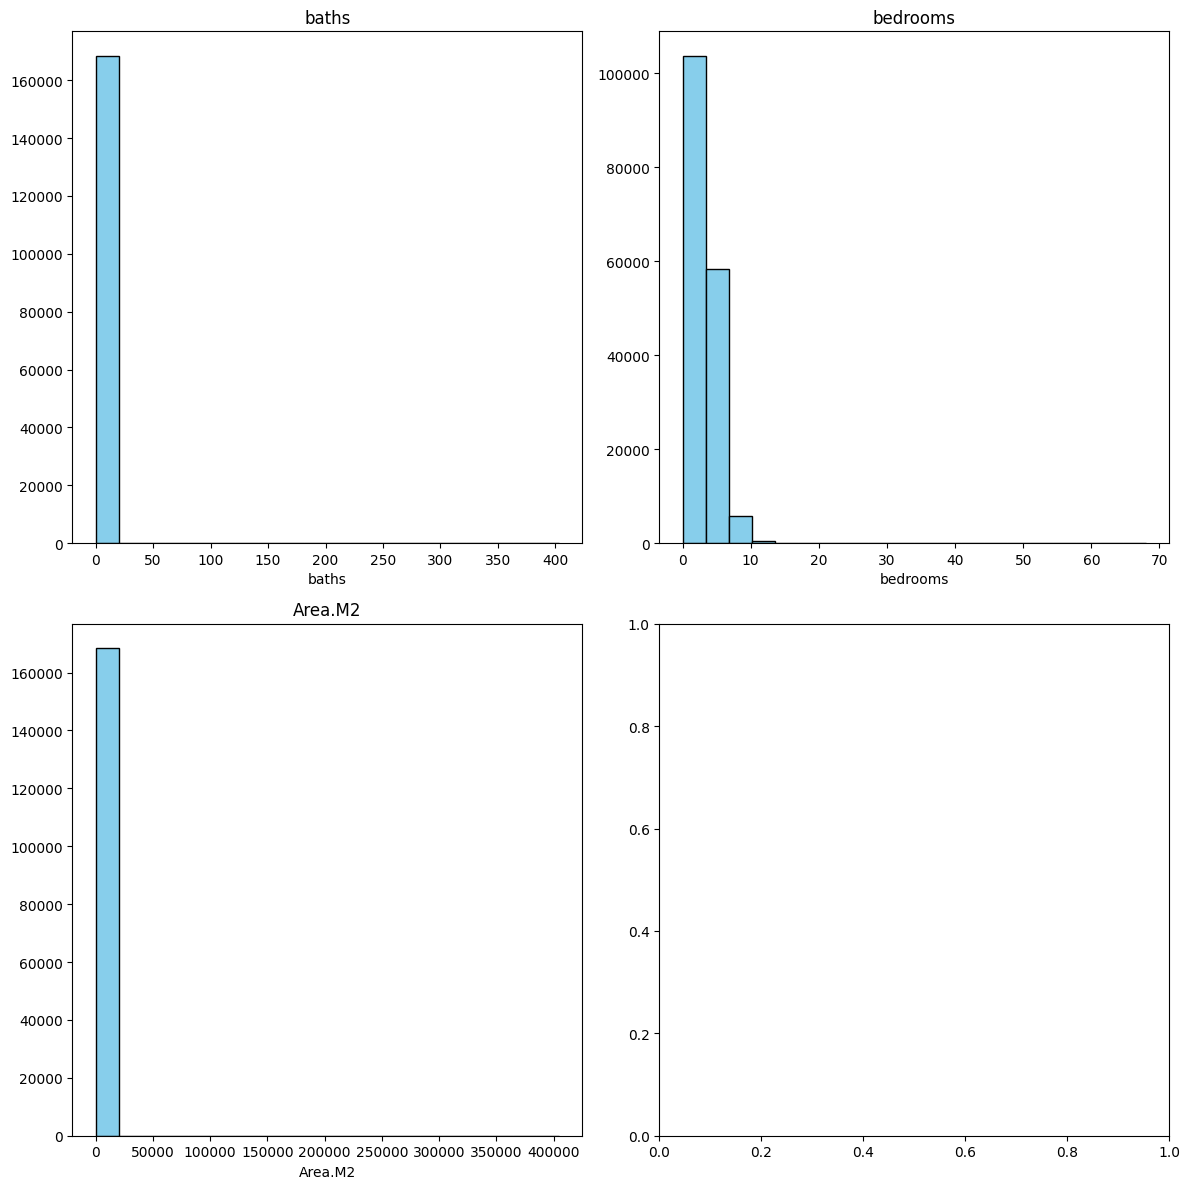

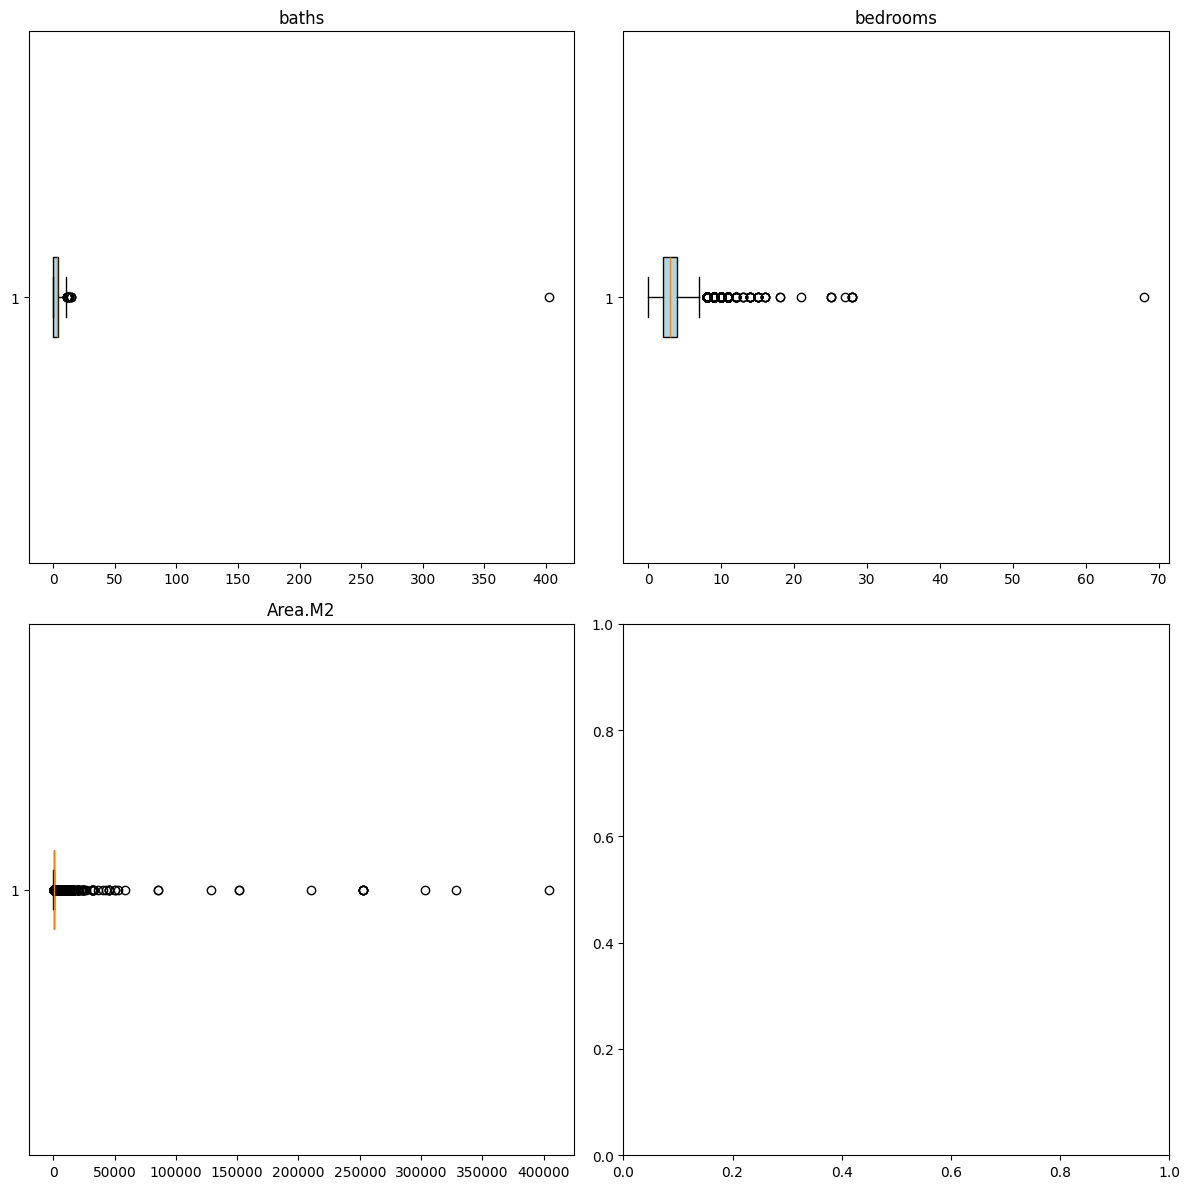

In [8]:
num_cols = df_H.select_dtypes(include=["number"])

num_features = len(num_cols.columns)
rows = int(np.ceil(num_features / 2))

# Histogram untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Berdasarkan hasil eksplorasi terhadap variabel yang berbentuk numerik menggunakan histogram dan boxplot menghasilkan visualisasi yang sulit dilihat dikarenakan memiliki distribusi yang condong ke kanan dengan sangat banyak pencilan. Oleh karena itu seluruh peubah numerik di transformasi ke dalam bentuk logaritma natural agar mengurangi kemiringan (skewness) pada distribusi sehingga sebaran mendekati sebaran normal

In [9]:
numerical_cols = df_H.select_dtypes(include=[np.number]).columns

# Mengubah semua kolom numerik menjadi log natural
df_H[numerical_cols] = df_H[numerical_cols].apply(lambda x: np.log(x + 1))
print(df_H.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   city           168446 non-null  object 
 2   province_name  168446 non-null  object 
 3   baths          168446 non-null  float64
 4   purpose        168446 non-null  object 
 5   bedrooms       168446 non-null  float64
 6   harga          168446 non-null  object 
 7   Area.M2        168446 non-null  float64
dtypes: float64(3), object(5)
memory usage: 10.3+ MB
None


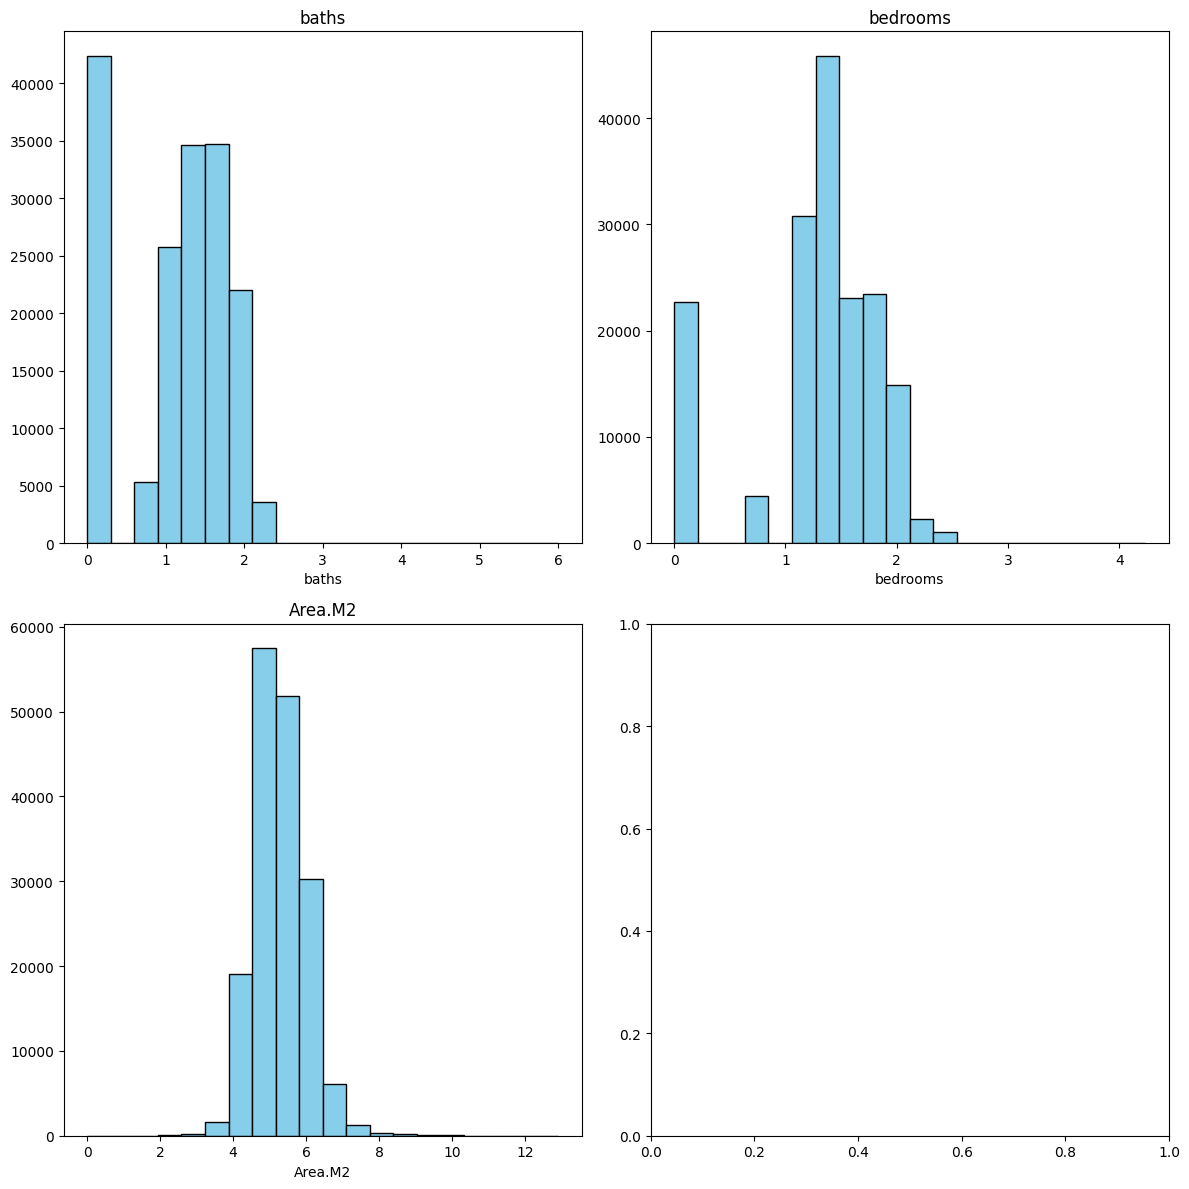

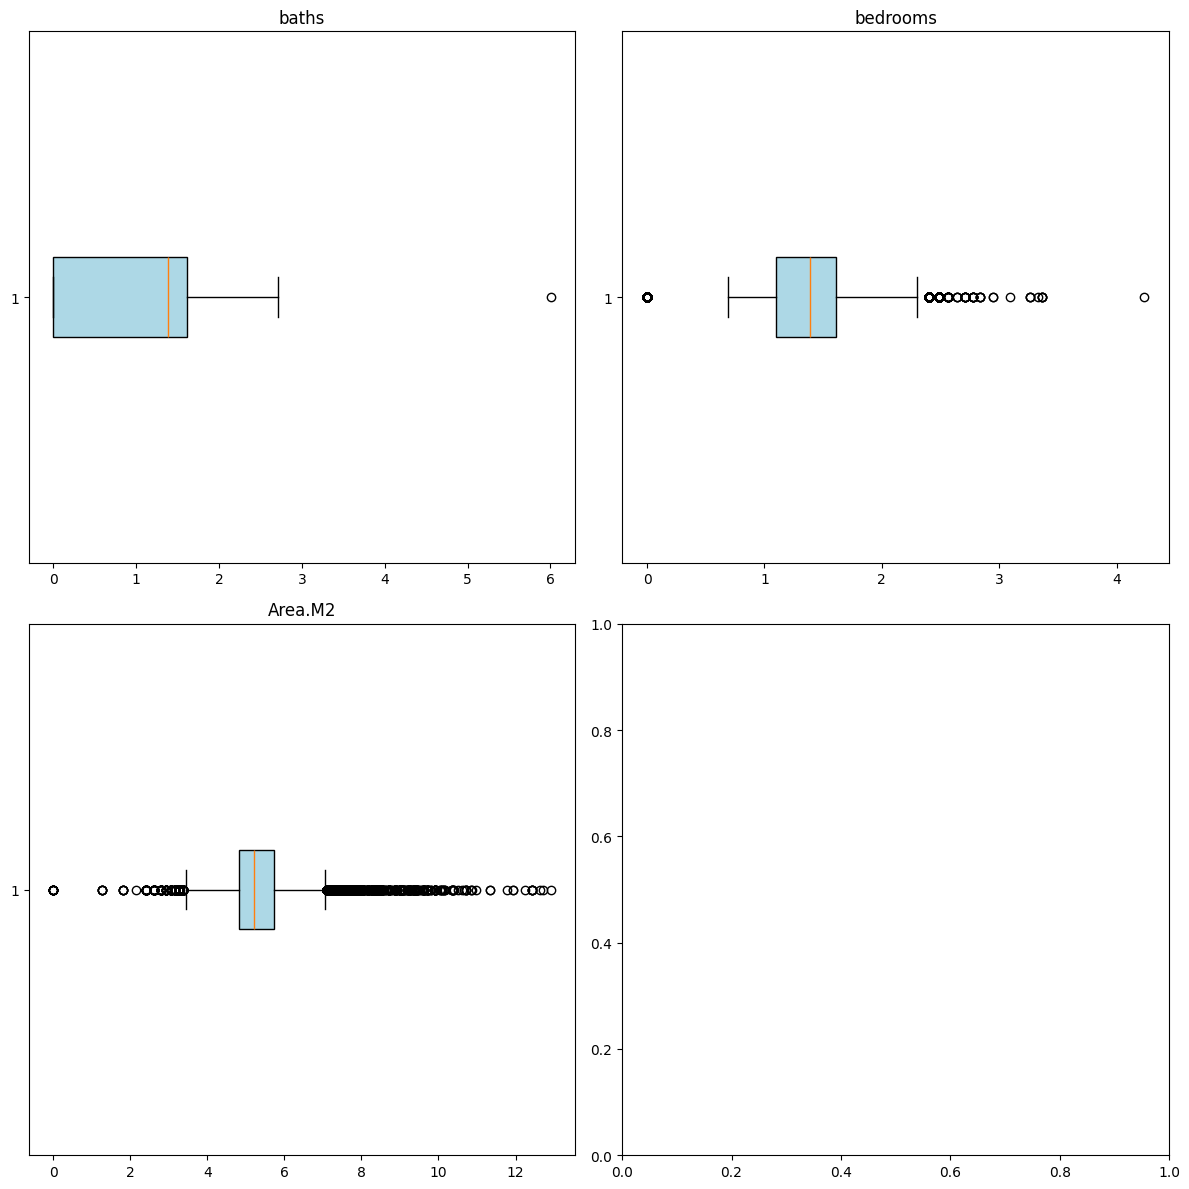

In [10]:
num_cols = df_H.select_dtypes(include=["number"])

num_features = len(num_cols.columns)
rows = int(np.ceil(num_features / 2))

# Histogram untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Setelah dilakukan transformasi ke dalam bentuk logaritmik, visualisasi menjadi lebih jelas.  Mayoritas properti memiliki 1 kamar mandi dan 1 kamar tidur. Untuk luas area (Area.M2), sebagian besar properti memiliki ukuran kecil hingga sedang, dengan sedikit properti yang memiliki luas jauh lebih besar.

Sementara itu dapat terlihat di dalam boxplot juga masih banyak indikasi outlier dalam dataset. Namun, dalam kasus ini, pencilan tersebut tidak dilakukan penanganan lebih lanjut.

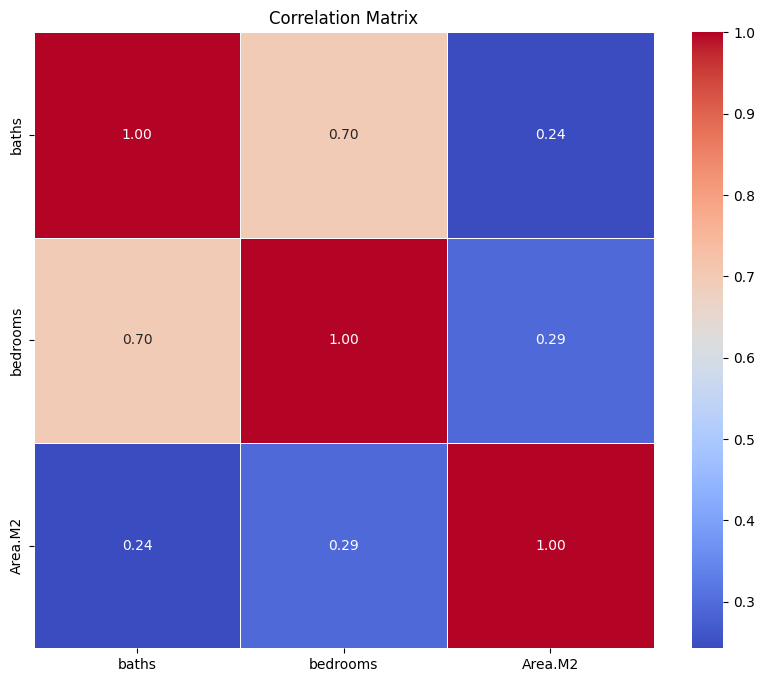

In [11]:
num_cols = df_H.select_dtypes(include=[np.number]).columns
correlation_matrix = df_H[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

Berdasarkan matriks korelasi yang ditampilkan, terdapat beberapa hubungan yang cukup signifikan antara variabel-variabel dalam dataset:  

**Hubungan Positif Kuat:**  
Variabel `baths` memiliki korelasi tinggi dengan `bedrooms` (0.70), menunjukkan bahwa properti dengan lebih banyak kamar tidur cenderung juga memiliki lebih banyak kamar mandi.  

**Hubungan Positif Lemah:**  
Variabel `baths` dan `Area.M2` memiliki korelasi sebesar 0.24, sedangkan `bedrooms` dengan `Area.M2` memiliki korelasi 0.29. Ini menunjukkan bahwa luas properti memiliki hubungan yang relatif lemah dengan jumlah kamar mandi dan kamar tidur, sehingga ada kemungkinan properti dengan luas yang lebih besar tidak selalu memiliki lebih banyak kamar atau kamar mandi.  

Secara keseluruhan, hubungan yang paling kuat dalam dataset ini adalah antara jumlah kamar tidur dan jumlah kamar mandi, sementara luas area memiliki korelasi yang lebih rendah dengan kedua variabel lainnya.

In [12]:
df_H.head(5)

,property_type,city,province_name,baths,purpose,bedrooms,harga,Area.M2
0,Flat,Islamabad,Islamabad Capital,1.098612,For Sale,1.098612,Murah,4.626654
1,Flat,Islamabad,Islamabad Capital,1.386294,For Sale,1.386294,Sangat Murah,4.960326
2,House,Islamabad,Islamabad Capital,1.945910,For Sale,1.791759,Murah,5.314895
3,House,Islamabad,Islamabad Capital,1.609438,For Sale,1.609438,Sangat Mahal,6.920389
4,House,Islamabad,Islamabad Capital,1.386294,For Sale,1.386294,Sangat Murah,5.314895


property_type: 7 unique values
city: 5 unique values
province_name: 3 unique values
purpose: 2 unique values
harga: 4 unique values


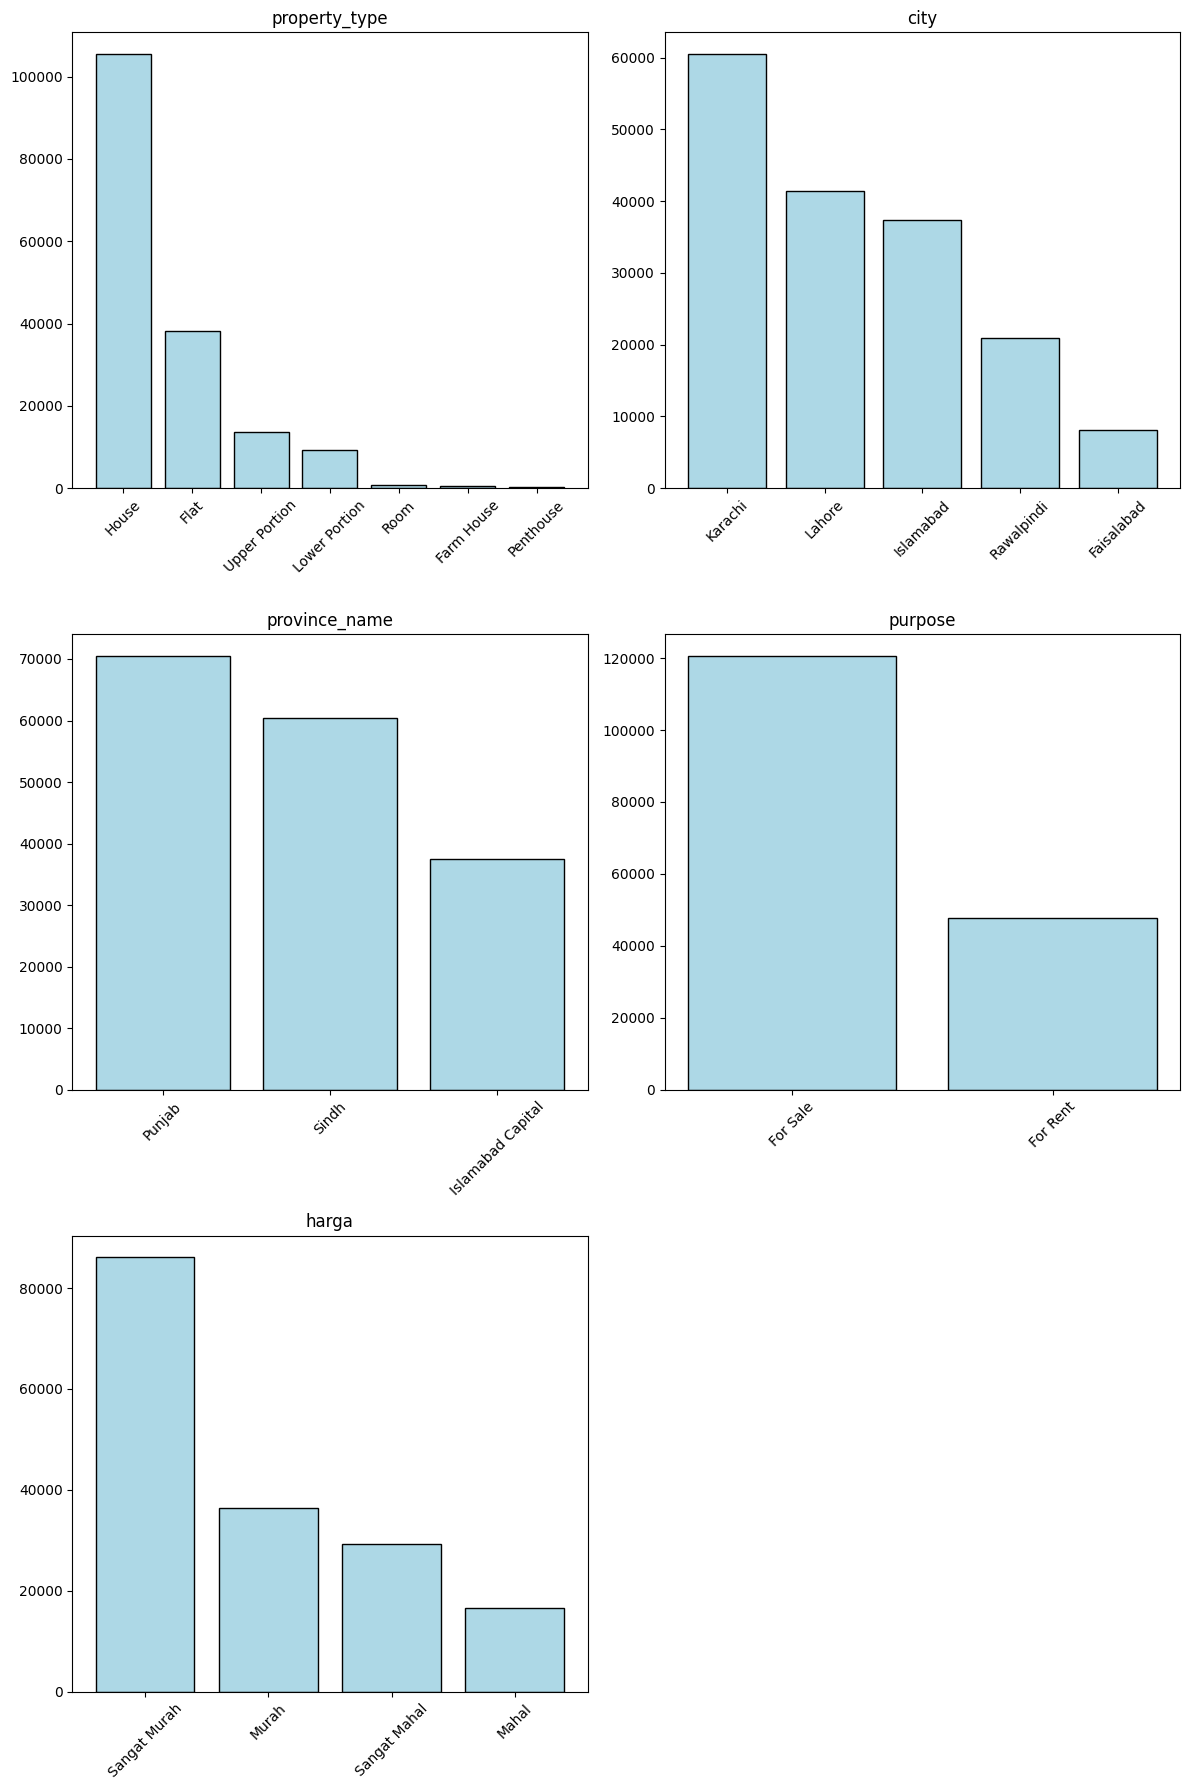

In [13]:
for col in df_H.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df_H[col].nunique()} unique values")
for col in ["property_type", "city", "province_name", "purpose", "harga"]:
    df_H[col] = df_H[col].astype("category")

cat_cols = df_H.select_dtypes(include=["category"])
num_cats = len(cat_cols.columns)

if num_cats > 0:
    rows = int(np.ceil(num_cats / 2))

    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols.columns):
        counts = cat_cols[col].value_counts()
        axes[i].bar(counts.index, counts.values, color="lightblue", edgecolor="black")
        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom kategorikal dalam dataset.")

Hasil eksplorasi terhadap variabel kategorik menggunakan diagram batang menunjukkan bahwa tipe rumah yang paling umum adalah rumah yang dijual, dengan jumlah tertinggi berada di Kota Karachi, Provinsi Punjab dengan tujuan utama penjualan adalah for sale. Selain itu, mayoritas harga rumah termasuk dalam kategori sangat murah, karena berada di bawah rata-rata harga penjualan secara keseluruhan.

Ketidakseimbangan jumlah data dalam variabel harga antara kategori murah dan mahal dapat disebabkan oleh adanya nilai ekstrem dalam data, yang menyebabkan rata-rata harga rumah menjadi lebih tinggi.

# Data Preprocessing

## Splitting Data

In [14]:
from sklearn.model_selection import train_test_split

random_state = 234
df_train, df_test = train_test_split(df_H, test_size=0.3, stratify=df_H["harga"], random_state=random_state)
harga_test = df_test["harga"]

Dataset telah melalui proses pra-pemrosesan yang mengonversi variabel kategori ke tipe data category, yang dapat mempercepat komputasi dalam model machine learning. Selanjutnya, untuk digunakan dalam pemodelan berbasis numerik, variabel kategori mungkin perlu dikodekan lebih lanjut menggunakan teknik seperti label encoding atau one-hot encoding.

In [15]:
df_train.isnull().sum()

,0
property_type,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
harga,0
Area.M2,0


In [16]:
df_test.isnull().sum()

,0
property_type,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
harga,0
Area.M2,0


## *Features Scaling*

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Memisahkan fitur (X) dan target (y)
train_X = df_train.drop(columns=["harga"])  # Menghapus kolom target dari X
test_X = df_test.drop(columns=["harga"])
train_y = df_train["harga"]  # Mengambil target y
test_y = df_test["harga"]

# One-hot encoding untuk fitur kategorikal
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)
train_X, test_X = train_X.align(test_X, join="left", axis=1, fill_value=0)
train_X = train_X.values
test_X = test_X.values

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Label Encoding untuk target y
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)


num_classes = len(le.classes_)
train_y = to_categorical(train_y, num_classes=num_classes)
test_y = to_categorical(test_y, num_classes=num_classes)

print("Shape train_X:", train_X.shape)
print("Shape test_X:", test_X.shape)
print("Shape train_y:", train_y.shape)
print("Shape test_y:", test_y.shape)


Shape train_X: (117912, 20)
Shape test_X: (50534, 20)
Shape train_y: (117912, 4)
Shape test_y: (50534, 4)


- `train_X.shape = (117912, 20)` → Data training memiliki **117.912 sampel** dan **20 fitur** setelah one-hot encoding.  
- `test_X.shape = (50534, 20)` → Data testing memiliki **50.534 sampel** dengan jumlah fitur yang sama.  
- `train_y.shape = (117912, 4)` dan `test_y.shape = (50534, 4)` menunjukkan bahwa target kini memiliki empat kolom, sesuai hasil one-hot encoding.  

Dataset telah berhasil dikonversi ke bentuk numerik dengan preprocessing yang lengkap, mencakup one-hot encoding untuk fitur kategori, normalisasi untuk fitur numerik, serta encoding target untuk memastikan model dapat memahami dan memprosesnya dengan baik.

## ADASYN

Berdasarkan hasil eksplorasi data, ditemukan adanya ketidakseimbangan pada variabel target, di mana jumlah observasi dengan kelas "sangat murah" jauh lebih banyak dibandingkan dengan kelas "sangat mahal". Ketidakseimbangan ini dapat menyebabkan model cenderung lebih berpihak pada kelas mayoritas, sehingga mengurangi kemampuan model dalam mengenali pola dari kelas minoritas.  

Untuk mengatasi permasalahan ini, diperlukan teknik penyeimbangan data, salah satunya adalah *Adaptive Synthetic Sampling* (ADASYN). Metode ini bekerja dengan membuat sampel sintetis untuk kelas minoritas secara adaptif, dengan lebih banyak sampel dihasilkan pada area dengan kepadatan data yang lebih rendah. Pendekatan ini membantu model belajar lebih baik terhadap pola kelas minoritas yang sulit dibedakan, sehingga meningkatkan keseimbangan data dan akurasi prediksi secara keseluruhan.

Kelebihan ADASYN dibandingkan SMOTE adalah ADASYN menghasilkan lebih banyak sampel sintetis di daerah dengan kepadatan data rendah, sehingga lebih fokus pada area yang lebih sulit dibedakan oleh model. Hal ini membuat ADASYN lebih efektif dalam menangani kelas minoritas dengan distribusi yang tidak merata, sementara SMOTE menghasilkan sampel secara merata di seluruh ruang fitur.

In [18]:
from imblearn.over_sampling import ADASYN
from collections import Counter
import numpy as np

train_y_labels = np.argmax(train_y, axis=1)

print("Distribusi sebelum ADASYN:", Counter(train_y_labels))
adasyn = ADASYN(sampling_strategy="auto", random_state=42)

# Melakukan oversampling pada data latih
train_X_resampled, train_y_resampled = adasyn.fit_resample(train_X, train_y_labels)
print("Distribusi sesudah ADASYN:", Counter(train_y_resampled))

# konversi kembali ke one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = train_y.shape[1]  # Mengambil jumlah kelas dari one-hot sebelumnya
train_y_resampled = to_categorical(train_y_resampled, num_classes=num_classes)

print("Shape train_X_resampled:", train_X_resampled.shape)
print("Shape train_y_resampled:", train_y_resampled.shape)



Distribusi sebelum ADASYN: Counter({3: 60274, 1: 25539, 2: 20454, 0: 11645})
Distribusi sesudah ADASYN: Counter({0: 61413, 3: 60274, 1: 60221, 2: 58836})
Shape train_X_resampled: (240744, 20)
Shape train_y_resampled: (240744, 4)


Berdasarkan hasil penerapan ADASYN, distribusi data target berhasil diseimbangkan, sehingga jumlah amatan pada kedua kelas kini hampir setara, yaitu sebanyak 61.413 amatan untuk kelas sangat murah, 60.274 amatan untuk kelas murah, 60.221 amatan untuk kelas mahal, dan 58.836 amatan untuk kelas sangat mahal. Dengan demikian, permasalahan *class imbalance* yang sebelumnya ada dalam dataset telah teratasi, yang diharapkan dapat meningkatkan kinerja model dalam melakukan prediksi, terutama dalam mengklasifikasikan kelas minoritas.

# Pemodelan dengan 1 *Hidden Layer*

In [19]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_X_resampled.shape[1],)),
    Dense(train_y_resampled.shape[1], activation='softmax')
])

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,404 (25.02 KB)

 Trainable params: 6,404 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

Hasil pemodelan Artificial Neural Network (ANN) menunjukkan bahwa model terdiri dari 2 layer, dengan rincian sebagai berikut:

1. **Dense Layer 1 (Hidden Layer)**:
   - Memiliki 256 neuron dengan jumlah parameter sebanyak 5.376.
   - Jumlah parameter dihitung sebagai:  
     (jumlah fitur input × jumlah neuron) + bias = (jumlah fitur input × 256) + 256 = 5.376.

2. **Dense Layer 2 (Output Layer)**:
   - Memiliki 4 neuron, sesuai dengan jumlah kelas pada variabel target.
   - Menggunakan 1.028 parameter, dihitung sebagai:  
     (256 × 4) + 4 = 1.028.

**Kesimpulan**:
- Total parameter dalam model adalah 6.404, yang seluruhnya dapat di-train (trainable).
- Model ini relatif sederhana dengan 1 hidden layer dan output layer yang memiliki 4 neuron, yang sesuai untuk masalah klasifikasi multi-kelas.

Epoch 1/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5856 - loss: 0.9026 - val_accuracy: 0.1268 - val_loss: 2.3077
Epoch 2/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6980 - loss: 0.7011 - val_accuracy: 0.1428 - val_loss: 2.1285
Epoch 3/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.6984 - loss: 0.7000 - val_accuracy: 0.1425 - val_loss: 2.2652
Epoch 4/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.6990 - loss: 0.6926 - val_accuracy: 0.1248 - val_loss: 2.2322
Epoch 5/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7008 - loss: 0.6911 - val_accuracy: 0.1937 - val_loss: 2.0495
Epoch 6/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7011 - loss: 0.6925 - val_accuracy: 0.1839 - val_loss: 2.0844
Epoch 7/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7038 - loss: 0.6857 - val_accuracy: 0.1512 - val_loss: 2.4193
Epoch 8/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7033 -

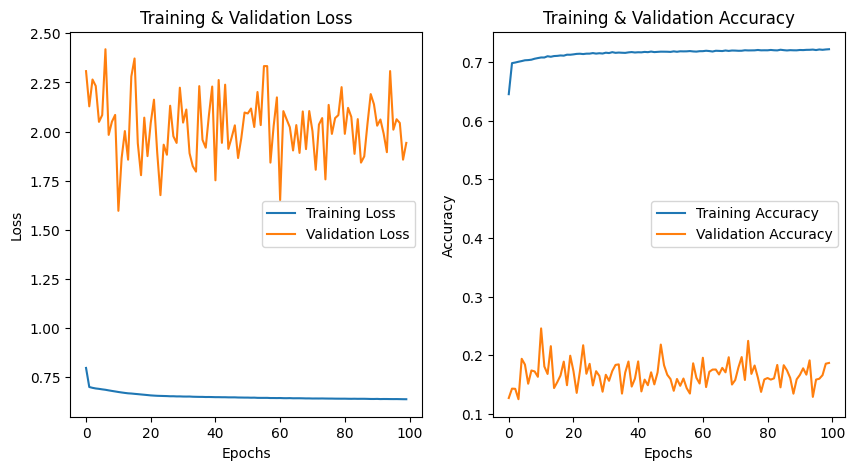

In [20]:
history = model.fit(
    train_X_resampled, train_y_resampled,
    shuffle=True,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

Hasil visualisasi menunjukkan tren loss dan akurasi untuk data training serta validasi selama 100 epoch.  

1. **Training & Validation Loss**:  
   - Loss pada data training cenderung stabil dengan sedikit penurunan.  
   - Loss pada data validasi menunjukkan fluktuasi yang cukup tinggi, yang dapat mengindikasikan ketidakstabilan dalam proses generalisasi model.  

2. **Training & Validation Accuracy**:  
   - Akurasi training relatif stabil di sekitar 72%.  
   - Akurasi validasi mengalami fluktuasi yang signifikan, dengan peningkatan dan penurunan drastis, yang bisa mengindikasikan adanya overfitting atau model yang kurang stabil.  

**Kesimpulan**:  
- Fluktuasi yang besar pada loss dan akurasi validasi dapat menunjukkan bahwa model kurang stabil dan mungkin memerlukan perbaikan, seperti pengurangan learning rate, penambahan regulasi (dropout atau L2 regularization), atau peningkatan jumlah data pelatihan.  
- Performa training yang cukup stabil namun validasi yang tidak konsisten dapat menjadi indikasi bahwa model terlalu fit terhadap data training dan kurang mampu melakukan generalisasi dengan baik.

In [21]:
scores = model.evaluate(test_X, test_y)

# Menampilkan hasil evaluasi (loss dan accuracy)
print(f"Test Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")

1580/1580 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7678 - loss: 0.5298
Test Loss: 0.5306
Test Accuracy: 0.7682


Model menunjukkan performa yang baik dengan **test loss sebesar 0.5306** dan **test accuracy 76.82%**, yang mengindikasikan prediksi yang kurang baik dengan tingkat kesalahan yang cukup tinggi. Akurasi yang cukup rendah menunjukkan model kurang mampu mengenali pola dalam data uji.

# Pemodelan dengan 2 *Hidden Layer* dan *Dropout*

In [22]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_X_resampled.shape[1],)),  # Hidden Layer 1
    Dropout(0.2),
    Dense(128, activation='relu'),  # Hidden Layer 2
    Dropout(0.2),
    Dense(train_y.shape[1], activation='softmax')  # Output Layer
])

# Mengkompilasi model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,788 (151.52 KB)

 Trainable params: 38,788 (151.52 KB)

 Non-trainable params: 0 (0.00 B)

Model yang digunakan memiliki tiga layer, terdiri dari dua hidden layer dan satu output layer, dengan jumlah parameter total sebesar 38.788. Rinciannya adalah sebagai berikut:

1. **Dense Layer 1 (Hidden Layer 1)**:
   - Memiliki 256 neuron dengan jumlah parameter sebanyak 5.376.
   - Diikuti oleh **Dropout Layer**, yang bertujuan untuk mengurangi risiko overfitting.

2. **Dense Layer 2 (Hidden Layer 2)**:
   - Memiliki 128 neuron dengan jumlah parameter sebanyak 32.896.
   - Diikuti oleh **Dropout Layer** lagi untuk mencegah overfitting lebih lanjut.

3. **Dense Layer 3 (Output Layer)**:
   - Memiliki 4 neuron, sesuai dengan jumlah kelas pada variabel target.
   - Menggunakan 516 parameter.

**Kesimpulan**:
- Total parameter dalam model adalah 38.788, yang seluruhnya dapat di-train (trainable).
- Model ini lebih kompleks dibandingkan model sebelumnya dengan dua hidden layer dan penggunaan Dropout untuk mengurangi risiko overfitting. Struktur ini berpotensi meningkatkan kemampuan generalisasi, namun perlu evaluasi lebih lanjut untuk memastikan tidak terjadi overfitting atau underfitting.

In [23]:
# Melatih model
history = model.fit(
    train_X_resampled, train_y_resampled,
    shuffle=True,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
)

# Menampilkan ringkasan model
model.summary()

Epoch 1/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6074 - loss: 0.8569 - val_accuracy: 0.1538 - val_loss: 1.9926
Epoch 2/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6866 - loss: 0.7132 - val_accuracy: 0.1304 - val_loss: 2.3340
Epoch 3/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6934 - loss: 0.6993 - val_accuracy: 0.2008 - val_loss: 1.7230
Epoch 4/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.6947 - loss: 0.6927 - val_accuracy: 0.1529 - val_loss: 1.9615
Epoch 5/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7015 - loss: 0.6839 - val_accuracy: 0.1611 - val_loss: 2.1265
Epoch 6/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7027 - loss: 0.6814 - val_accuracy: 0.1597 - val_loss: 2.0037
Epoch 7/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7034 - loss: 0.6776 - val_accuracy: 0.1438 - val_loss: 2.2482
Epoch 8/100
6019/6019 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7062 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,366 (454.56 KB)

 Trainable params: 38,788 (151.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,578 (303.04 KB)

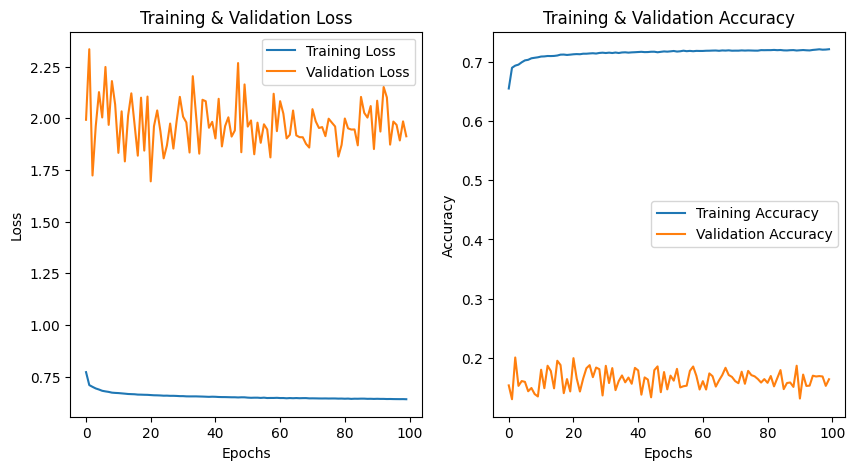

In [24]:
# Menampilkan plot pembelajaran model pada setiap epoch
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

Grafik menunjukkan bahwa **training loss dan validation loss mengalami penurunan yang stabil**, menandakan model berhasil belajar dengan baik tanpa indikasi overfitting yang signifikan. Pada grafik akurasi, **training accuracy dan validation accuracy meningkat secara bertahap**, namun dengan validation accuracy yang masih berfluktuatif. Hal ini menunjukkan bahwa model mampu melakukan generalisasi dengan lebih baik dibandingkan sebelumnya terhadap data baru.

In [25]:
# Mengevaluasi model menggunakan data uji
scores = model.evaluate(test_X, test_y, verbose=0)  # verbose=0 untuk menyembunyikan output evaluasi

# Menampilkan hasil evaluasi (loss dan accuracy)
print(f"Test Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")

Test Loss: 0.5678
Test Accuracy: 0.7431


Hasil evaluasi menunjukkan bahwa model memiliki **test loss sebesar 0.5678** dan **test accuracy sebesar 74.31%**, yang menandakan bahwa model masih kurang mampu dalam melakukan prediksi. Nilai loss yang cukup tinggi juga mengindikasikan bahwa kesalahan prediksi relatif besar. Namun nilai akurasi yang lebih rendah daripada model dengan 1 *hidden layer* menunjukkan bahwa model dengan i *hidden layer* lebih mampu menggeneralisasi data uji.

# Pemodelan dengan *Tuning Optimizer*

In [26]:
# Parameter model
input_dim = train_X_resampled.shape[1]  # Jumlah fitur input
output_dim = train_y_resampled.shape[1] # Jumlah kelas output

# Daftar optimizer yang akan diuji
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum_SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01)
}

# Fungsi untuk membuat model dengan optimizer tertentu
def create_model(optimizer):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_dim,)),  # Hidden Layer 1
        Dense(output_dim, activation="softmax")  # Output Layer
    ])

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    model.summary()  # Menampilkan arsitektur model

    return model

# Fungsi untuk melatih model dan menyimpan histori loss & akurasi
def train_and_evaluate(optimizer_name, optimizer):
    model = create_model(optimizer)

    history = model.fit(
        train_X_resampled, train_y_resampled,
        shuffle=True,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Simpan hasil training
    results = pd.DataFrame({
        "optimizer": [optimizer_name] * 100,
        "epoch": list(range(1, 101)),
        "loss": history.history["val_loss"],
        "accuracy": history.history["val_accuracy"]
    })

    return {"model": model, "results": results}


Syntax diatas bertujuan untuk membandingkan performa empat optimizer berbeda, yaitu SGD, Momentum SGD, Adam, dan RMSprop, dalam melatih model ANN. Model terdiri dari satu hidden layer dengan 64 neuron beraktivasi ReLU dan output layer dengan aktivasi softmax untuk klasifikasi multikelas. Setiap model dikompilasi menggunakan categorical crossentropy sebagai fungsi loss dan dilatih selama 100 epoch dengan batch size 32 serta validasi sebesar 20% dari data latih. Hasil pelatihan berupa nilai loss dan akurasi validasi dicatat untuk setiap epoch guna mengevaluasi kinerja masing-masing optimizer.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

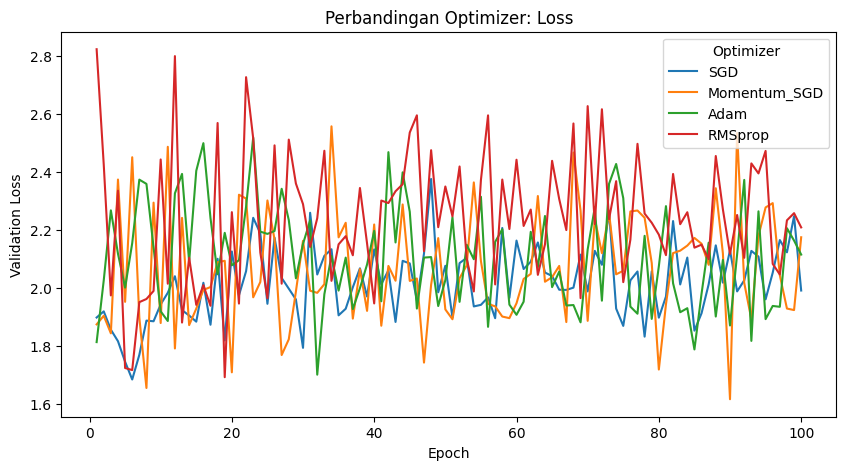

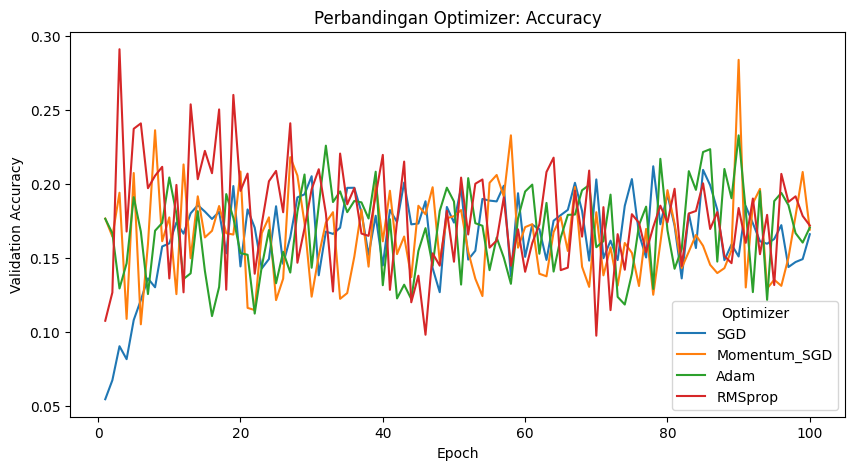

In [27]:
# Jalankan training untuk setiap optimizer
models_results = [train_and_evaluate(name, optimizers[name]) for name in optimizers]

# Menggabungkan hasil training dari semua optimizer
results = pd.concat([res["results"] for res in models_results], ignore_index=True)

# Menyimpan model yang telah dilatih
models = {name: res["model"] for name, res in zip(optimizers.keys(), models_results)}

# Plot perbandingan loss antar optimizer
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="epoch", y="loss", hue="optimizer")
plt.title("Perbandingan Optimizer: Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(title="Optimizer")
plt.show()

# Plot perbandingan akurasi antar optimizer
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="epoch", y="accuracy", hue="optimizer")
plt.title("Perbandingan Optimizer: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend(title="Optimizer")
plt.show()

Grafik pertama menunjukkan perbandingan loss pada data validasi untuk berbagai optimizer. Secara eksplorasi sulit menentukan optimizer mana yang memiliki akurasi lebih tinggi karena terlihat bentuknya yang cukup abstrak mirip.

In [28]:
# Mengevaluasi setiap model dengan data uji dan menyimpan hasilnya
evaluation_results = {}

for name, model in models.items():
    scores = model.evaluate(test_X, test_y, verbose=0)  # Evaluasi model
    evaluation_results[name] = {"Test Loss": scores[0], "Test Accuracy": scores[1]}

# Menampilkan hasil evaluasi untuk setiap optimizer
for name, result in evaluation_results.items():
    print(f"Optimizer: {name}")
    print(f"Test Loss: {result['Test Loss']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("-" * 30)

Optimizer: SGD
Test Loss: 0.6115
Test Accuracy: 0.7384
------------------------------
Optimizer: Momentum_SGD
Test Loss: 0.6039
Test Accuracy: 0.7426
------------------------------
Optimizer: Adam
Test Loss: 0.6061
Test Accuracy: 0.7302
------------------------------
Optimizer: RMSprop
Test Loss: 0.6759
Test Accuracy: 0.7073
------------------------------


Berdasarkan hasil evaluasi pada data uji, optimizer Momentup SGD menunjukkan performa terbaik dengan test loss terendah (0.6039) dan test accuracy tertinggi (0.7426). Optimizer Adam memiliki performa yang mendekati Momentup SGD, namun dengan akurasi yang sedikit lebih rendah (0.7302). Sementara itu, RMSprop dan SGD memiliki loss yang lebih besar dan akurasi yang lebih rendah, menunjukkan bahwa mereka kurang efektif dalam mengoptimalkan model dibandingkan Adam. Oleh karena itu, **Momentum SGD merupakan pilihan terbaik untuk model ini** karena memberikan keseimbangan yang optimal antara minimisasi loss dan peningkatan akurasi.

# Pemodelan dengan *Tuning Learning Rate*

In [29]:
# Daftar learning rate yang akan diuji
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Fungsi untuk membuat model dengan learning rate tertentu
def create_model(learning_rate):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),  # Hidden Layer
        Dense(output_dim, activation="softmax")  # Output Layer
    ])

    optimizer = Momentum_SGD(learning_rate=learning_rate)

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    return model

# Fungsi untuk melatih model dan menyimpan hasil
def train_and_evaluate(lr_name, learning_rate):
    model = create_model(learning_rate)

    history = model.fit(
        train_X_resampled, train_y_resampled,
        shuffle=True,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Simpan hasil training dan validasi dalam DataFrame
    results = pd.DataFrame({
        "learning_rate": [lr_name] * 100,
        "epoch": list(range(1, 101)),
        "train_loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "train_accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"]
    })

    return {"model": model, "history": results}


Syntax diatas bertujuan untuk mengevaluasi pengaruh berbagai learning rate terhadap performa model neural network menggunakan optimizer Momentum SGD. Model yang digunakan memiliki satu hidden layer dengan 256 neuron dan output layer dengan aktivasi softmax. Fungsi `create_model` membangun model dengan learning rate tertentu, sedangkan `train_and_evaluate` melatih model selama 100 epoch dengan batch size 32 dan validation split 20%. Hasil pelatihan, termasuk loss dan akurasi pada data training serta validasi, disimpan dalam DataFrame untuk analisis lebih lanjut.

In [30]:
# Menyimpan hasil training dan model untuk setiap learning rate
results_list = {}
models = {}

for lr in learning_rates:
    lr_name = f"lr_{lr}"
    train_result = train_and_evaluate(lr_name, lr)

    models[lr_name] = train_result["model"]  # Simpan model
    results_list[lr_name] = train_result["history"]  # Simpan hasil training

# Gabungkan semua hasil training ke dalam satu dataframe
results = pd.concat(results_list.values(), ignore_index=True)
results

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,learning_rate,epoch,train_loss,val_loss,train_accuracy,val_accuracy
0,lr_0.0001,1,1.020838,1.862719,0.518773,0.062224
1,lr_0.0001,2,0.943952,1.881875,0.550580,0.067873
2,lr_0.0001,3,0.877775,1.779344,0.597456,0.081435
3,lr_0.0001,4,0.813108,1.872355,0.640396,0.107437
4,lr_0.0001,5,0.765902,1.743834,0.672125,0.133585
...,...,...,...,...,...,...
395,lr_0.1,96,0.793875,2.654730,0.649461,0.226339
396,lr_0.1,97,0.793593,1.519344,0.647940,0.411535
397,lr_0.1,98,0.792487,2.418479,0.648070,0.153337
398,lr_0.1,99,0.792922,1.760897,0.649877,0.037363


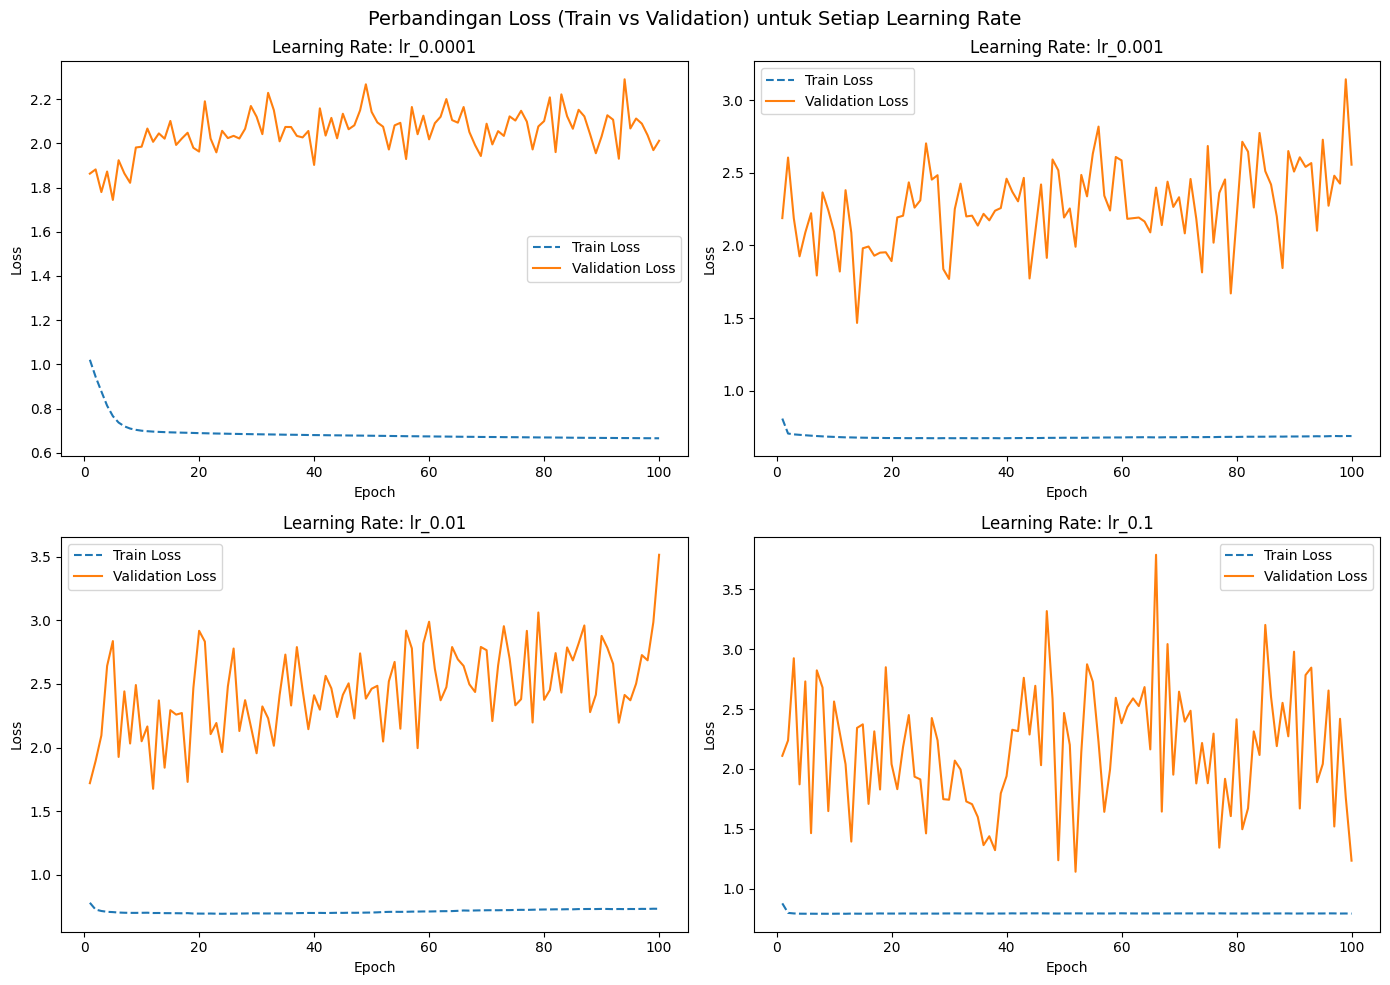

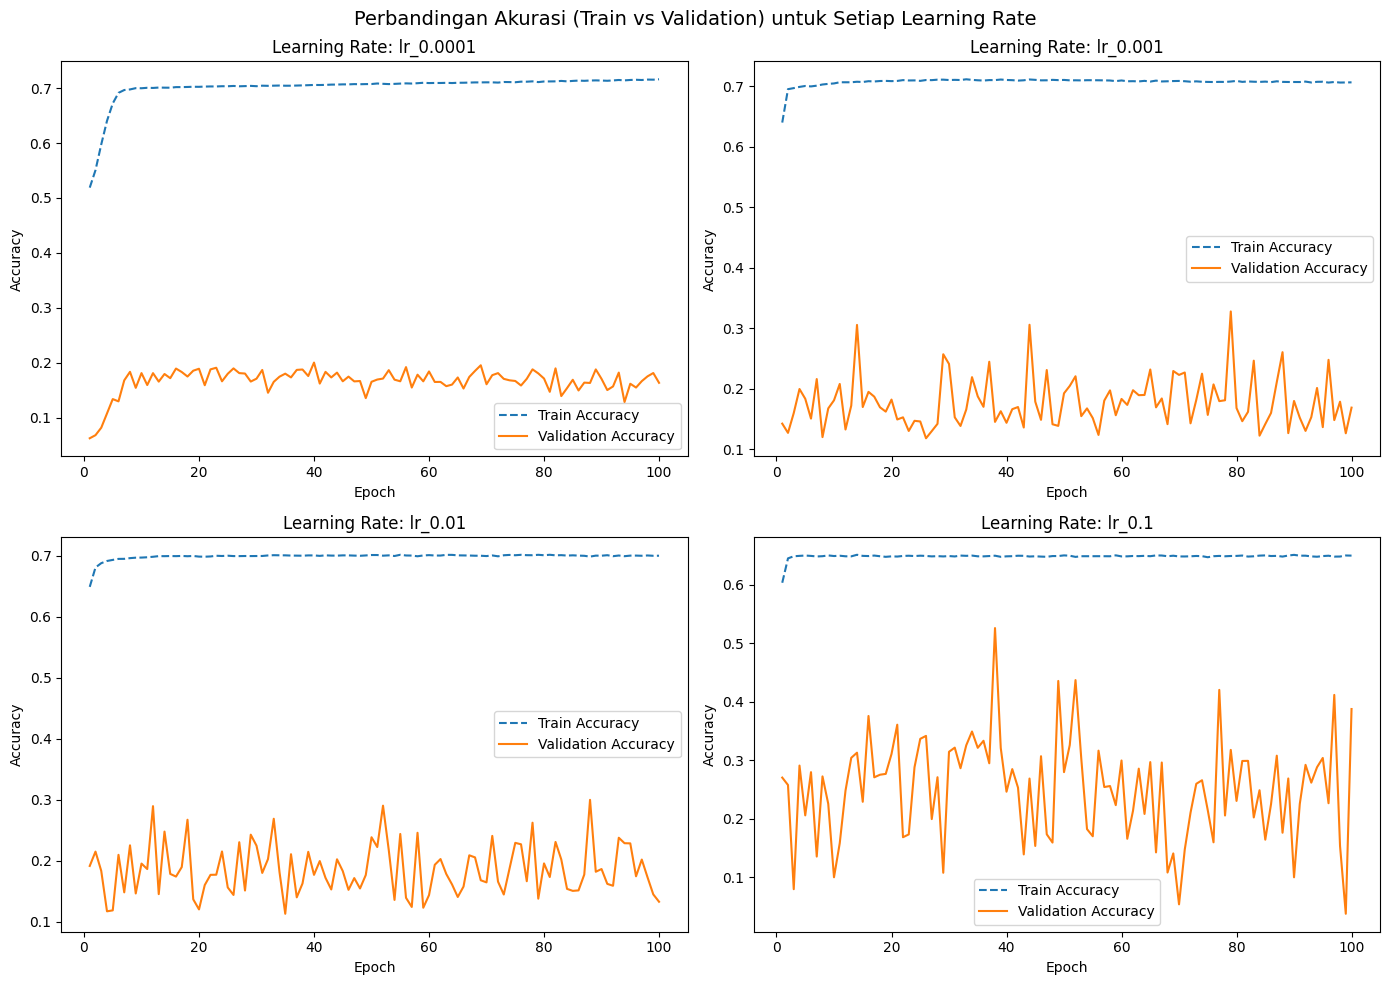

In [31]:
# Dapatkan daftar unique learning rate
unique_lrs = results["learning_rate"].unique()

# Buat subplot dengan 2 baris, 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten agar lebih mudah diakses dengan loop

# Loop untuk membuat grafik Loss per learning rate
for i, lr in enumerate(unique_lrs):
    subset = results[results["learning_rate"] == lr]

    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="train_loss", label="Train Loss", linestyle="dashed")
    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="val_loss", label="Validation Loss")

    axes[i].set_title(f"Learning Rate: {lr}")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()

plt.suptitle("Perbandingan Loss (Train vs Validation) untuk Setiap Learning Rate", fontsize=14)
plt.tight_layout()
plt.show()

# Buat subplot dengan 2 baris, 2 kolom untuk Accuracy
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop untuk membuat grafik Accuracy per learning rate
for i, lr in enumerate(unique_lrs):
    subset = results[results["learning_rate"] == lr]

    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="train_accuracy", label="Train Accuracy", linestyle="dashed")
    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="val_accuracy", label="Validation Accuracy")

    axes[i].set_title(f"Learning Rate: {lr}")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Accuracy")
    axes[i].legend()

plt.suptitle("Perbandingan Akurasi (Train vs Validation) untuk Setiap Learning Rate", fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
# Evaluasi setiap model pada data uji
for lr_name, model in models.items():
    scores = model.evaluate(test_X, test_y, verbose=0)  # Evaluasi model
    print(f"{lr_name}:")
    print(f"  - Test Loss: {scores[0]:.4f}")
    print(f"  - Test Accuracy: {scores[1]:.4f}")
    print("-" * 40)

lr_0.0001:
  - Test Loss: 0.5874
  - Test Accuracy: 0.7438
----------------------------------------
lr_0.001:
  - Test Loss: 0.6099
  - Test Accuracy: 0.7543
----------------------------------------
lr_0.01:
  - Test Loss: 0.7615
  - Test Accuracy: 0.7331
----------------------------------------
lr_0.1:
  - Test Loss: 0.7753
  - Test Accuracy: 0.6831
----------------------------------------


Hasil pengujian menunjukkan bahwa **learning rate 0.001 memberikan performa terbaik** dengan test loss terendah (0.6099) dan test accuracy tertinggi (0.7543), menandakan bahwa model mampu melakukan generalisasi dengan baik. Learning rate yang terlalu kecil (0.0001) menghasilkan loss yang cukup rendah tetapi dengan akurasi yang lebih rendah, menunjukkan bahwa konvergensi lebih lambat. Sementara itu, learning rate yang terlalu besar (0.01 dan 0.1) menyebabkan performa menurun, kemungkinan karena optimasi menjadi tidak stabil atau melewatkan titik optimal.

## Prediksi

In [33]:
# Melakukan prediksi pada data uji
prediksi = models["lr_0.001"].predict(test_X)
print(prediksi[:5])  # Menampilkan 5 prediksi pertama

1580/1580 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[1.2135230e-01 4.5805867e-03 8.7406492e-01 2.0486168e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01]
 [9.3776280e-06 6.0438644e-02 6.8084837e-16 9.3955195e-01]
 [5.7695977e-02 8.3913571e-01 1.6963911e-04 1.0299868e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01]]


Hasil prediksi menunjukkan probabilitas keluaran untuk empat kelas pada lima sampel pertama dari data uji. Setiap baris merepresentasikan probabilitas model terhadap masing-masing kelas, dengan jumlah total mendekati 1.  

Misalnya:  
- **Sampel pertama** memiliki probabilitas tertinggi pada kelas keempat (0.874), sehingga kemungkinan besar diklasifikasikan sebagai kelas keempat.  
- **Sampel kedua** menunjukkan probabilitas hampir 1 (0.99999994) pada kelas keempat, menandakan model sangat yakin dengan prediksi ini.  
- **Sampel ketiga** memiliki probabilitas tertinggi pada kelas keempat (0.939), menunjukkan kecenderungan kuat untuk diklasifikasikan ke kelas tersebut.  
- **Sampel keempat** memiliki probabilitas (0.839) pada kelas kedua, menunjukkan sampel ini masuk ke kelas tersebut.  
- **Sampel kelima** juga memiliki probabilitas hampir 1 (0.99999994) pada kelas keempat, menunjukkan prediksi yang sangat pasti.

In [34]:
print(df_test["harga"].unique())


['Sangat Mahal', 'Sangat Murah', 'Murah', 'Mahal']
Categories (4, object): ['Mahal', 'Murah', 'Sangat Mahal', 'Sangat Murah']


In [35]:
label_pred = np.argmax(prediksi, axis=1)

# Label sebenarnya dari dataset
label_true = df_test["harga"].map({"Sangat Murah": 0, "Murah": 1, "Mahal": 2, "Sangat Mahal": 3}).astype(int)

# Evaluasi Model

In [36]:
# Menampilkan confusion matrix
cm = confusion_matrix(label_true, label_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  563  2931    26 22312]
 [ 3772  6157   127   890]
 [ 4206   580   166    38]
 [ 2979   305  5444    38]]


**Baris pertama (Kelas Aktual 1):**  
- **563 (TP)** → Model benar memprediksi kelas 1 sebagai kelas 1.  
- **2931 (FN)** → Model salah memprediksi kelas 1 sebagai kelas 2.  
- **26 (FN)** → Model salah memprediksi kelas 1 sebagai kelas 3.  
- **22312 (FN)** → Model salah memprediksi kelas 1 sebagai kelas 4.  

**Baris kedua (Kelas Aktual 2):**  
- **3772 (FN)** → Model salah memprediksi kelas 2 sebagai kelas 1.  
- **6157 (TP)** → Model benar memprediksi kelas 2 sebagai kelas 2.  
- **127 (FN)** → Model salah memprediksi kelas 2 sebagai kelas 3.  
- **890 (FN)** → Model salah memprediksi kelas 2 sebagai kelas 4.  

**Baris ketiga (Kelas Aktual 3):**  
- **4206 (FN)** → Model salah memprediksi kelas 3 sebagai kelas 1.  
- **580 (FN)** → Model salah memprediksi kelas 3 sebagai kelas 2.  
- **166 (TP)** → Model benar memprediksi kelas 3 sebagai kelas 3.  
- **38 (FN)** → Model salah memprediksi kelas 3 sebagai kelas 4.  

**Baris keempat (Kelas Aktual 4):**  
- **2979 (FN)** → Model salah memprediksi kelas 4 sebagai kelas 1.  
- **305 (FN)** → Model salah memprediksi kelas 4 sebagai kelas 2.  
- **5444 (FN)** → Model salah memprediksi kelas 4 sebagai kelas 3.  
- **38 (TP)** → Model benar memprediksi kelas 4 sebagai kelas 4.  

---

**False Positives (FP) Per Kelas:**  

- **Kelas 1:** 3772 + 4206 + 2979 = **10,957 FP**  
- **Kelas 2:** 2931 + 580 + 305 = **3,816 FP**  
- **Kelas 3:** 26 + 127 + 5444 = **5,597 FP**  
- **Kelas 4:** 22,312 + 890 + 38 = **23,240 FP**  

---

Kesimpulan:  
- **Kelas 1 dan 4 banyak False Negatives** → Model sering gagal mengenali kelas ini.  
- **Kelas 4 punya False Positives yang sangat tinggi** → Model sering salah menganggap data lain sebagai kelas 4.  
- **Kelas 3 punya prediksi yang lumayan buruk, karena TP-nya hanya 166.**  
- **Kelas 2 performanya lebih baik dibanding yang lain, TP-nya cukup besar (6157).**  

In [37]:
# Menampilkan classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(label_true, label_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.02      0.03     25832
           1       0.62      0.56      0.59     10946
           2       0.03      0.03      0.03      4990
           3       0.00      0.00      0.00      8766

    accuracy                           0.14     50534
   macro avg       0.17      0.16      0.16     50534
weighted avg       0.16      0.14      0.15     50534



1. **Kelas 0 (Sangat Murah):**
- **Precision (0.05)**: Model hanya benar 5% dari semua prediksi untuk kelas 0. Ini menunjukkan bahwa meskipun ada banyak data yang benar-benar kelas 0, model sering kali salah memprediksi kelas ini dan memasukannya ke kelas lain.
- **Recall (0.02)**: Model hampir tidak mendeteksi kelas 0 sama sekali. Dari semua data yang sebenarnya kelas 0, hanya sekitar 2% yang terdeteksi dengan benar.
- **F1-Score (0.03)**: Karena recall sangat rendah, f1-score juga menunjukkan performa yang sangat buruk. Hal ini menunjukkan bahwa model sangat buruk dalam mendeteksi kelas yang memiliki nilai "sangat murah".

2. **Kelas 1 (Murah):**
- **Precision (0.62)**: Dari semua prediksi kelas 1, hanya 62% yang benar. Model cukup sering salah memprediksi kelas 1 sebagai kelas lain, meskipun kelas ini tidak terlalu mahal.
- **Recall (0.56)**: Model lebih baik dalam mendeteksi kelas 1, dengan 56% dari semua data kelas 1 terdeteksi dengan benar. Ini menunjukkan bahwa model bisa mengidentifikasi kelas "murah" dengan cukup baik meskipun tidak sempurna.
- **F1-Score (0.59)**: Dengan recall yang cukup baik, f1-score lebih tinggi daripada kelas 0, tetapi masih menunjukkan bahwa model perlu peningkatan, khususnya dalam hal precision.

3. **Kelas 2 (Mahal):**
- **Precision (0.03)**: Precision sangat rendah, yang berarti model sangat sering salah memprediksi kelas 2 (mahal) ke kelas lain. Hanya 3% dari prediksi kelas 2 yang benar.
- **Recall (0.03)**: Model hanya mendeteksi 3% dari data kelas 2 yang sebenarnya, menunjukkan bahwa kelas "mahal" hampir tidak terdeteksi oleh model.
- **F1-Score (0.03)**: Kinerja keseluruhan pada kelas ini sangat buruk, baik dalam hal precision maupun recall, yang menyebabkan f1-score juga rendah.

4. **Kelas 3 (Sangat Mahal):**
- **Precision (0.00)**: Model sangat buruk dalam memprediksi kelas 3 (sangat mahal). tidak ada prediksi untuk kelas 3 yang benar.
- **Recall (0.00)**: Model tidak mendeteksi apapun dari data kelas 3 yang sebenarnya. Ini menunjukkan bahwa kelas "sangat mahal" tidak terdeteksi sama sekali.
- **F1-Score (0.00)**: Karena kedua metrik precision dan recall sangat rendah, f1-score juga sangat buruk. Model sangat buruk dalam mendeteksi kelas "sangat mahal".

5. **Akurasi Keseluruhan:**
- **Akurasi (0.14)**: Model hanya dapat mengklasifikasikan 14% data dengan benar secara keseluruhan. Ini menunjukkan bahwa meskipun ada beberapa deteksi yang benar, model tidak dapat mengklasifikasikan dengan baik secara umum.

6. **Macro Average:**
- **Precision: 0.17, Recall: 0.16, F1-Score: 0.16**: Rata-rata nilai untuk semua kelas sangat rendah. Hal ini menunjukkan bahwa model secara keseluruhan tidak dapat mengklasifikasikan kelas-kelas dengan baik, terutama kelas dengan nilai yang lebih mahal.

7. **Weighted Average:**
- **Precision: 0.16, Recall: 0.14, F1-Score: 0.15**: Rata-rata tertimbang, yang mempertimbangkan jumlah sampel di setiap kelas, juga menunjukkan performa model yang buruk. Model lebih cenderung mengklasifikasikan kelas dengan frekuensi lebih tinggi, tetapi tetap buruk dalam mendeteksi kelas yang lebih sedikit, seperti kelas mahal dan sangat mahal.

Kesimpulan:
Model ini sangat buruk dalam mendeteksi kelas-kelas yang lebih mahal (kelas 2 dan kelas 3) yang penting untuk aplikasi dengan variabel harga atau biaya. Model menunjukkan performa yang sangat rendah untuk kelas "sangat murah" (kelas 0) dan "sangat mahal" (kelas 3), meskipun ada sedikit kemampuan dalam mendeteksi kelas "murah" (kelas 1). Performa yang sangat buruk ini menunjukkan bahwa model perlu perbaikan signifikan, terutama dalam meningkatkan kemampuannya untuk membedakan kelas yang lebih mahal.

In [38]:
# Mengevaluasi model menggunakan data uji
scores = models["lr_0.001"].evaluate(test_X, test_y, verbose=0)
print(f"\nTest Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")


Test Loss: 0.6099
Test Accuracy: 0.7543


Model memiliki **test loss sebesar 0.6099**, yang menunjukkan bahwa error prediksi masih sangat besar. **Akurasi pengujian sebesar 75.43%** menunjukkan juga bahwa model kurang baik dalam mengklasifikasikan data uji.

#Menyimpan dan Memuat Model

In [39]:
# Menyimpan model dalam format keras
models["lr_0.001"].save("model_nn_sgd.keras")

# Memuat model dari file keras
new_model = load_model("model_nn_sgd.keras")

# Kompilasi ulang sebelum evaluasi
new_model.compile(
    optimizer="RMSprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Menampilkan arsitektur model yang dimuat
new_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,404 (25.02 KB)

 Trainable params: 6,404 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

Model **"sequential_9"** terdiri dari **dua lapisan dense**. Lapisan pertama adalah **Dense(256)** dengan **5.376 parameter**, berfungsi sebagai hidden layer dengan aktivasi ReLU. Lapisan kedua adalah **Dense(4)** dengan **1.028 parameter**, yang berfungsi sebagai output layer dengan aktivasi softmax untuk klasifikasi dua kelas. Total parameter yang dapat dilatih adalah **6.404**, menunjukkan model yang cukup kompleks.

# Kesimpulan

Berdasarkan hasil pemodelan yang dilakukan pada tiga arsitektur model yang berbeda, model dengan **satu hidden layer** menghasilkan performa terbaik dengan **nilai test loss sebesar 0.5306** dan **test accuracy mencapai 76.82%**. Model ini menunjukkan generalisasi yang lebih baik dibandingkan model lainnya, sehingga dipilih sebagai model terbaik untuk digunakan dalam prediksi.

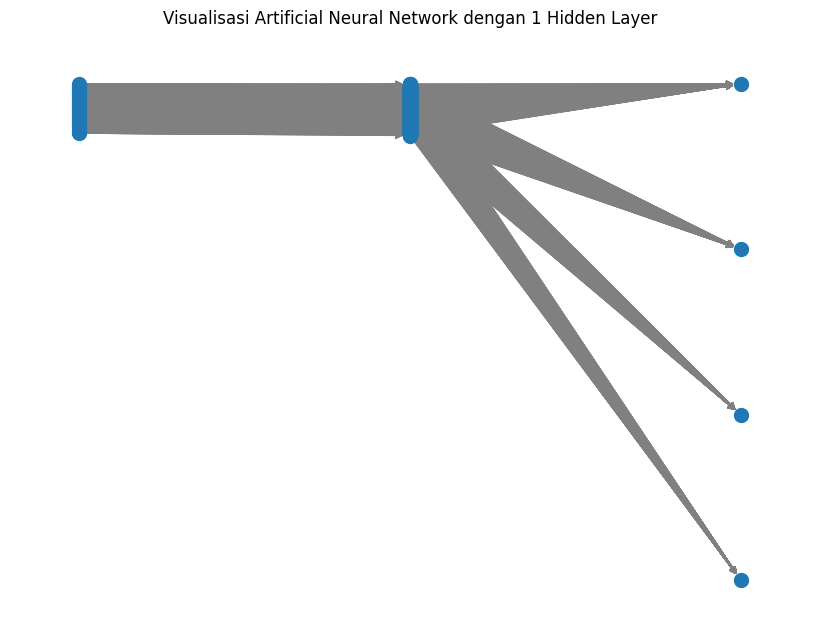

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Jumlah neuron di tiap layer
input_neurons = 20
hidden_neurons = 256
output_neurons = 4

# Buat graph
G = nx.DiGraph()

# Posisi node
pos = {}

# Tambahkan input layer
for i in range(input_neurons):
    G.add_node(f"I{i}", layer=0)
    pos[f"I{i}"] = (0, -i)

# Tambahkan hidden layer
for i in range(hidden_neurons):
    G.add_node(f"H{i}", layer=1)
    pos[f"H{i}"] = (1, -i * (input_neurons / hidden_neurons))

# Tambahkan output layer
for i in range(output_neurons):
    G.add_node(f"O{i}", layer=2)
    pos[f"O{i}"] = (2, -i * (hidden_neurons / output_neurons))

# Buat edge dari input ke hidden layer
for i in range(input_neurons):
    for j in range(hidden_neurons):
        G.add_edge(f"I{i}", f"H{j}")

# Buat edge dari hidden ke output layer
for i in range(hidden_neurons):
    for j in range(output_neurons):
        G.add_edge(f"H{i}", f"O{j}")

# Plot jaringan saraf
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=100, edge_color="gray")
plt.title("Visualisasi Artificial Neural Network dengan 1 Hidden Layer")
plt.show()